In [68]:
import pandas as pd
df=pd.read_csv('SOCATv2024_Indian1.csv',low_memory=False)

In [69]:
df=df.rename(columns={'longitude [dec.deg.E]' : 'Lon', 'latitude [dec.deg.N]' : 'Lat',
                      'yr':'year',
                      'mon':'month',
                      'ss':'second',
                      'hh':'hour',
                      'mm':'minute',
                      'sal' : 'Salinity',
                      'SST [deg.C]' : 'SST',
                      'PPPP [hPa]' : 'Atmospheric_Pressure',
                      'fCO2water_SST_wet [uatm]':'fCO2water_SST_wet'})

In [72]:
data=df[['Lat', 'Lon', 'day', 'month', 'year', 'hour', 'minute', 'second', 'Salinity', 'SST', 'Atmospheric_Pressure', 'fCO2water_SST_wet']].copy()

In [74]:
bay_of_bengal_lat_range = (5, 22)
bay_of_bengal_lon_range = (80, 98)

In [76]:
# Filter data for Bay of Bengal
df_bay_of_bengal = data[(data['Lat'] >= bay_of_bengal_lat_range[0]) & (data['Lat'] <= bay_of_bengal_lat_range[1]) &
                      (data['Lon'] >= bay_of_bengal_lon_range[0]) & (data['Lon'] <= bay_of_bengal_lon_range[1])].reset_index()

In [78]:
df_bay_of_bengal=df_bay_of_bengal.drop('index', axis=1)

In [80]:
df_bay_of_bengal.loc[:,'minute']=0

df_bay_of_bengal.loc[:, 'second']=0
df_bay_of_bengal['second'] = df_bay_of_bengal['second'].astype(int)

In [82]:
df_bay_of_bengal

,Lat,Lon,day,month,year,hour,minute,second,Salinity,SST,Atmospheric_Pressure,fCO2water_SST_wet
0,14.982,89.929,6,3,2016,6,0,0,31.912,28.261,NaN,372.30
1,14.982,89.929,6,3,2016,6,0,0,31.911,28.339,NaN,374.80
2,14.982,89.929,6,3,2016,7,0,0,31.892,28.417,NaN,375.50
3,14.982,89.929,6,3,2016,7,0,0,31.842,28.400,NaN,375.10
4,14.982,89.929,6,3,2016,8,0,0,31.831,28.422,NaN,373.70
...,...,...,...,...,...,...,...,...,...,...,...,...
25583,5.260,90.170,3,7,1987,1,0,0,34.400,28.900,1011.5,366.04
25584,5.340,90.540,3,7,1987,4,0,0,34.490,28.900,1011.6,382.71
25585,5.390,90.810,3,7,1987,4,0,0,34.530,28.900,1011.3,350.38
25586,5.450,91.100,3,7,1987,6,0,0,34.570,28.900,1011.0,352.08


In [20]:
df_bay_of_bengal.isna().sum()

Lat                        0
Lon                        0
day                        0
month                      0
year                       0
hour                       0
minute                     0
second                     0
Salinity                   6
SST                        0
Atmospheric_Pressure    6269
fCO2water_SST_wet       8843
dtype: int64

In [22]:
df_bay_of_bengal['year'].value_counts()

year
1995    8837
2016    7852
1999    3085
2017    2879
2007    2106
2018     816
1987       7
1962       6
Name: count, dtype: int64

In [24]:
# Splitting data
train_df = df_bay_of_bengal[df_bay_of_bengal['year'] != 2007].reset_index()
test_df = df_bay_of_bengal[df_bay_of_bengal['year'] == 2007].reset_index()

In [26]:
train_df.drop(['index', 'year', 'Lat', 'Lon', 'month', 'day', 'hour', 'minute', 'second'], axis=1, inplace=True)

In [28]:
train_df

,Salinity,SST,Atmospheric_Pressure,fCO2water_SST_wet
0,31.912,28.261,NaN,372.30
1,31.911,28.339,NaN,374.80
2,31.892,28.417,NaN,375.50
3,31.842,28.400,NaN,375.10
4,31.831,28.422,NaN,373.70
...,...,...,...,...
23477,34.400,28.900,1011.5,366.04
23478,34.490,28.900,1011.6,382.71
23479,34.530,28.900,1011.3,350.38
23480,34.570,28.900,1011.0,352.08


In [30]:
train_df.isna().sum()

Salinity                   6
SST                        0
Atmospheric_Pressure    6269
fCO2water_SST_wet       8843
dtype: int64

In [32]:
test_df.drop(['index', 'year', 'Lat', 'Lon', 'month', 'day', 'hour', 'minute', 'second'], axis=1, inplace=True)

In [34]:
test_df

,Salinity,SST,Atmospheric_Pressure,fCO2water_SST_wet
0,34.07,30.45,1006.40,383.59
1,34.06,30.44,1006.36,387.24
2,34.05,30.42,1006.39,393.34
3,34.05,30.64,1006.39,391.98
4,34.07,30.54,1006.46,386.18
...,...,...,...,...
2101,33.56,30.88,1005.38,387.31
2102,33.14,30.53,1005.26,388.46
2103,32.94,30.68,1005.24,389.44
2104,33.07,30.94,1005.13,394.66


In [36]:
test_df.isna().sum()

Salinity                0
SST                     0
Atmospheric_Pressure    0
fCO2water_SST_wet       0
dtype: int64

In [39]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [41]:
x = train_df.drop('fCO2water_SST_wet', axis=1)
y = train_df['fCO2water_SST_wet']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
# Fill missing values with median
median_fCO2 = y_train.median(skipna=True)
y_train.fillna(median_fCO2, inplace=True)
y_test.fillna(median_fCO2, inplace=True)

In [46]:
# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dval = xgb.DMatrix(x_test, label=y_test)

In [48]:
# Define parameters
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "learning_rate": 0.1,
    "max_depth": 4,
    #'alpha': 1.5,         # L1 regularization
    #'lambda' : 3.0
}

In [50]:
# Train with early stopping
evals = [(dtrain, "train"), (dval, "validation")]
model = xgb.train(
    params, 
    dtrain, 
    num_boost_round=1000,  # Max rounds
    evals=evals,
    early_stopping_rounds=5,  # Stop if no improvement in last 5 rounds
    verbose_eval=True
)

[0]	train-rmse:14.85144	validation-rmse:15.06029
[1]	train-rmse:13.86034	validation-rmse:14.04364
[2]	train-rmse:12.97843	validation-rmse:13.14525
[3]	train-rmse:12.21200	validation-rmse:12.36516
[4]	train-rmse:11.53480	validation-rmse:11.66354
[5]	train-rmse:10.95277	validation-rmse:11.06426
[6]	train-rmse:10.43108	validation-rmse:10.53428
[7]	train-rmse:9.98348	validation-rmse:10.07083
[8]	train-rmse:9.60565	validation-rmse:9.68838
[9]	train-rmse:9.27145	validation-rmse:9.34579
[10]	train-rmse:8.98240	validation-rmse:9.04754
[11]	train-rmse:8.70813	validation-rmse:8.76725
[12]	train-rmse:8.44579	validation-rmse:8.50182
[13]	train-rmse:8.22550	validation-rmse:8.27728
[14]	train-rmse:8.04194	validation-rmse:8.09470
[15]	train-rmse:7.88993	validation-rmse:7.93781
[16]	train-rmse:7.74180	validation-rmse:7.78864
[17]	train-rmse:7.61919	validation-rmse:7.66155
[18]	train-rmse:7.50103	validation-rmse:7.54129
[19]	train-rmse:7.40455	validation-rmse:7.44346
[20]	train-rmse:7.30896	validation-

In [52]:
# Get the best iteration
best_iteration = model.best_iteration
print(f"Best iteration: {best_iteration}")

Best iteration: 391


In [56]:
# Separate target variable from test_df for predictions
test_features=test_df.drop('fCO2water_SST_wet', axis=1)
test_target=test_df['fCO2water_SST_wet']

dval1 = xgb.DMatrix(test_features, label=test_target)

In [58]:
y_pred = model.predict(dval1, iteration_range=(0, best_iteration))

testing_rmse=np.sqrt(mean_squared_error(test_target, y_pred))

print('XGBoost Regression :')
print('Testing RMSE :',testing_rmse)

XGBoost Regression :
Testing RMSE : 10.484975532826292


<Figure size 1200x600 with 0 Axes>

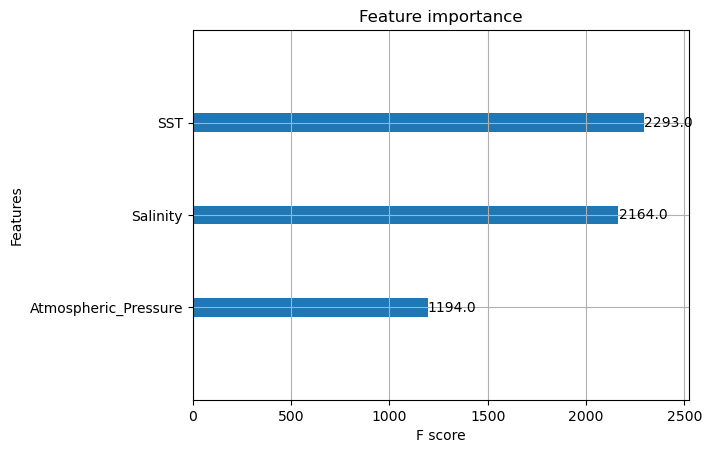

In [60]:
import xgboost as xgb
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
xgb.plot_importance(model)
plt.show()

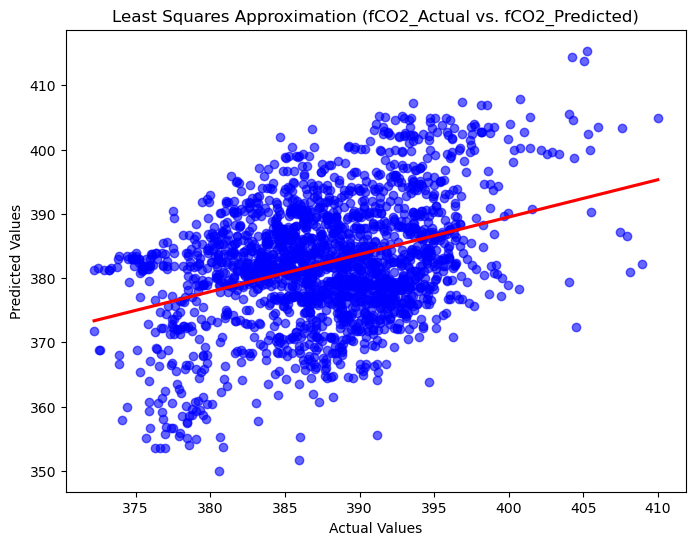

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.regplot(x=test_target, y=y_pred, scatter_kws={"color": "blue", "alpha": 0.6}, line_kws={"color": "red"}, ci=None)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Least Squares Approximation (fCO2_Actual vs. fCO2_Predicted)")
plt.show()

In [84]:
df_bay_of_bengal.columns

Index(['Lat', 'Lon', 'day', 'month', 'year', 'hour', 'minute', 'second',
       'Salinity', 'SST', 'Atmospheric_Pressure', 'fCO2water_SST_wet'],
      dtype='object')

In [86]:
df_bay_of_bengal=df_bay_of_bengal.drop(['Lat', 'Lon', 'day', 'month', 'year', 'hour', 'minute', 'second'], axis=1)

In [91]:
data1=df_bay_of_bengal.to_csv('fCO2_Bay_of_Bengal.csv')

### 15% Nan

In [10]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
df1=pd.read_csv('fCO2_Bay_of_Bengal.csv')
df1

,Unnamed: 0,Salinity,SST,Atmospheric_Pressure,fCO2water_SST_wet
0,0,31.912,28.261,NaN,372.30
1,1,31.911,28.339,NaN,374.80
2,2,31.892,28.417,NaN,375.50
3,3,31.842,28.400,NaN,375.10
4,4,31.831,28.422,NaN,373.70
...,...,...,...,...,...
25583,25583,34.400,28.900,1011.5,366.04
25584,25584,34.490,28.900,1011.6,382.71
25585,25585,34.530,28.900,1011.3,350.38
25586,25586,34.570,28.900,1011.0,352.08


In [12]:
df1=df1.drop('Unnamed: 0', axis=1)

In [14]:
df1.isna().sum()

Salinity                   6
SST                        0
Atmospheric_Pressure    6269
fCO2water_SST_wet       8843
dtype: int64

In [16]:
nan_rows = df1[df1[['Salinity', 'Atmospheric_Pressure','fCO2water_SST_wet']].isna().any(axis=1)]

In [18]:
nan_rows

,Salinity,SST,Atmospheric_Pressure,fCO2water_SST_wet
0,31.912,28.261,NaN,372.30
1,31.911,28.339,NaN,374.80
2,31.892,28.417,NaN,375.50
3,31.842,28.400,NaN,375.10
4,31.831,28.422,NaN,373.70
...,...,...,...,...
15107,34.170,30.300,NaN,389.56
15108,34.150,30.100,NaN,398.42
15109,34.160,30.230,NaN,394.98
15110,34.200,30.180,NaN,392.39


In [20]:
nan_rows.isna().sum()

Salinity                   6
SST                        0
Atmospheric_Pressure    6269
fCO2water_SST_wet       8843
dtype: int64

In [22]:
# Calculate 15% of the NaN rows
num_nan_to_select = int(0.15 * len(nan_rows))

In [23]:
num_nan_to_select

2266

In [26]:
# Randomly select 15% of NaN rows
nan_sample = nan_rows.sample(n=num_nan_to_select, random_state=42).reset_index(drop=True)

In [28]:
nan_sample

,Salinity,SST,Atmospheric_Pressure,fCO2water_SST_wet
0,32.190,27.410,996.95,NaN
1,33.490,28.380,996.48,NaN
2,33.030,30.050,NaN,399.7
3,32.610,28.670,995.76,NaN
4,32.664,28.923,NaN,384.5
...,...,...,...,...
2261,32.390,28.200,996.18,NaN
2262,34.190,28.560,995.13,NaN
2263,33.234,30.933,NaN,422.2
2264,33.500,28.810,991.16,NaN


In [30]:
nan_sample.isna().sum()

Salinity                   1
SST                        0
Atmospheric_Pressure     970
fCO2water_SST_wet       1296
dtype: int64

In [32]:
# Get rows that are fully non-NaN in fCO2water_SST_wet

non_nan_rows = df1.dropna(subset=['Atmospheric_Pressure','fCO2water_SST_wet']).reset_index(drop=True)

In [34]:
non_nan_rows

,Salinity,SST,Atmospheric_Pressure,fCO2water_SST_wet
0,34.57,29.20,1006.57,372.95
1,34.58,29.23,1006.66,373.72
2,34.58,29.22,1006.74,373.06
3,34.58,29.21,1006.64,373.22
4,34.59,29.23,1006.94,374.68
...,...,...,...,...
10471,34.40,28.90,1011.50,366.04
10472,34.49,28.90,1011.60,382.71
10473,34.53,28.90,1011.30,350.38
10474,34.57,28.90,1011.00,352.08


In [36]:
non_nan_rows.isna().sum()

Salinity                0
SST                     0
Atmospheric_Pressure    0
fCO2water_SST_wet       0
dtype: int64

In [38]:
# Combine 15% NaN rows with all non-NaN rows
new_df = pd.concat([nan_sample, non_nan_rows])

In [40]:
new_df = new_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [42]:
new_df.isna().sum()

Salinity                   1
SST                        0
Atmospheric_Pressure     970
fCO2water_SST_wet       1296
dtype: int64

In [44]:
x=new_df.drop('fCO2water_SST_wet', axis=1)
y=new_df['fCO2water_SST_wet']

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test1 = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
median_fCO2=y_train.median(skipna=True)
y_train=y_train.fillna(median_fCO2)
y_test1=y_test1.fillna(median_fCO2)

In [50]:
import xgboost as xgb

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dval = xgb.DMatrix(x_test, label=y_test1)

In [52]:
# Define parameters
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "learning_rate": 0.1,
    "max_depth": 4,
    #'alpha': 1.5,         # L1 regularization
    #'lambda' : 3.0         # L2
}

In [54]:
# Train with early stopping
evals = [(dtrain, "train"), (dval, "validation")]
model = xgb.train(
    params, 
    dtrain, 
    num_boost_round=1000,  # Max rounds
    evals=evals,
    early_stopping_rounds=5,  # Stop if no improvement in last 5 rounds
    verbose_eval=True
)

[0]	train-rmse:17.16298	validation-rmse:17.08202
[1]	train-rmse:15.83989	validation-rmse:15.77037
[2]	train-rmse:14.74367	validation-rmse:14.67990
[3]	train-rmse:13.67686	validation-rmse:13.62241
[4]	train-rmse:12.75860	validation-rmse:12.71421
[5]	train-rmse:11.93543	validation-rmse:11.89806
[6]	train-rmse:11.26899	validation-rmse:11.23902
[7]	train-rmse:10.65036	validation-rmse:10.62196
[8]	train-rmse:10.07905	validation-rmse:10.05743
[9]	train-rmse:9.61785	validation-rmse:9.60353
[10]	train-rmse:9.17666	validation-rmse:9.16847
[11]	train-rmse:8.81292	validation-rmse:8.81111
[12]	train-rmse:8.48410	validation-rmse:8.48134
[13]	train-rmse:8.20215	validation-rmse:8.20552
[14]	train-rmse:7.96304	validation-rmse:7.96634
[15]	train-rmse:7.75839	validation-rmse:7.76776
[16]	train-rmse:7.56451	validation-rmse:7.58026
[17]	train-rmse:7.39081	validation-rmse:7.41634
[18]	train-rmse:7.24626	validation-rmse:7.27808
[19]	train-rmse:7.13355	validation-rmse:7.17172
[20]	train-rmse:7.01857	validati

In [55]:
# Get the best iteration
best_iteration = model.best_iteration
print(f"Best iteration: {best_iteration}")

Best iteration: 372


In [56]:
y_train_pred=model.predict(dtrain, iteration_range=(0, best_iteration))
y_pred1=model.predict(dval, iteration_range=(0, best_iteration))

training_rmse=np.sqrt(mean_squared_error(y_train, y_train_pred))
testing_rmse=np.sqrt(mean_squared_error(y_test1, y_pred1))

print('XGBoost Regression :')
print('Training RMSE :',training_rmse)
print('Testing RMSE :',testing_rmse)

XGBoost Regression :
Training RMSE : 3.8671253427315255
Testing RMSE : 4.682496348253871


### 30% Nan

In [61]:
import pandas as pd
df1=pd.read_csv('fCO2_Bay_of_Bengal.csv')

df1=df1.drop('Unnamed: 0', axis=1)

nan_rows = df1[df1[['Salinity', 'Atmospheric_Pressure','fCO2water_SST_wet']].isna().any(axis=1)]

In [63]:
# Calculate 30% of the NaN rows
num_nan_to_select = int(0.30 * len(nan_rows))

# Randomly select 30% of NaN rows
nan_sample = nan_rows.sample(n=num_nan_to_select, random_state=42).reset_index(drop=True)

In [65]:
nan_sample.isna().sum()

Salinity                   3
SST                        0
Atmospheric_Pressure    1891
fCO2water_SST_wet       2642
dtype: int64

In [67]:
# Get rows that are fully non-NaN in fCO2water_SST_wet

non_nan_rows = df1.dropna(subset=['Atmospheric_Pressure','fCO2water_SST_wet']).reset_index(drop=True)

In [69]:
non_nan_rows.isna().sum()

Salinity                0
SST                     0
Atmospheric_Pressure    0
fCO2water_SST_wet       0
dtype: int64

In [71]:
# Combine 15% NaN rows with all non-NaN rows
new_df = pd.concat([nan_sample, non_nan_rows])

new_df = new_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [73]:
x=new_df.drop('fCO2water_SST_wet', axis=1)
y=new_df['fCO2water_SST_wet']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test2 = train_test_split(x, y, test_size=0.2, random_state=42)

median_fCO2=y_train.median(skipna=True)
y_train=y_train.fillna(median_fCO2)
y_test2=y_test2.fillna(median_fCO2)

import xgboost as xgb

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dval = xgb.DMatrix(x_test, label=y_test2)

# Define parameters
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "learning_rate": 0.1,
    "max_depth": 4,
    #'alpha': 1.5,         # L1 regularization
    #'lambda' : 3.0
}

# Train with early stopping
evals = [(dtrain, "train"), (dval, "validation")]
model = xgb.train(
    params, 
    dtrain, 
    num_boost_round=1000,  # Max rounds
    evals=evals,
    early_stopping_rounds=5,  # Stop if no improvement in last 5 rounds
    verbose_eval=True
)

[0]	train-rmse:16.41753	validation-rmse:16.35059
[1]	train-rmse:15.21072	validation-rmse:15.15912
[2]	train-rmse:14.20799	validation-rmse:14.15543
[3]	train-rmse:13.22778	validation-rmse:13.17425
[4]	train-rmse:12.38357	validation-rmse:12.34207
[5]	train-rmse:11.70159	validation-rmse:11.64379
[6]	train-rmse:11.01161	validation-rmse:10.95455
[7]	train-rmse:10.41528	validation-rmse:10.36615
[8]	train-rmse:9.95510	validation-rmse:9.88757
[9]	train-rmse:9.49781	validation-rmse:9.43983
[10]	train-rmse:9.12571	validation-rmse:9.07295
[11]	train-rmse:8.80043	validation-rmse:8.75149
[12]	train-rmse:8.49098	validation-rmse:8.44527
[13]	train-rmse:8.24521	validation-rmse:8.20116
[14]	train-rmse:8.01426	validation-rmse:7.97676
[15]	train-rmse:7.83975	validation-rmse:7.79822
[16]	train-rmse:7.66716	validation-rmse:7.62792
[17]	train-rmse:7.52380	validation-rmse:7.48902
[18]	train-rmse:7.37724	validation-rmse:7.34260
[19]	train-rmse:7.26281	validation-rmse:7.23217
[20]	train-rmse:7.15968	validation

In [74]:
# Get the best iteration
best_iteration = model.best_iteration
print(f"Best iteration: {best_iteration}")


y_train_pred=model.predict(dtrain, iteration_range=(0, best_iteration))
y_pred2=model.predict(dval, iteration_range=(0, best_iteration))

training_rmse=np.sqrt(mean_squared_error(y_train, y_train_pred))
testing_rmse=np.sqrt(mean_squared_error(y_test2, y_pred2))

print('XGBoost Regression :')
print('Training RMSE :',training_rmse)
print('Testing RMSE :',testing_rmse)

Best iteration: 309
XGBoost Regression :
Training RMSE : 4.402393745342679
Testing RMSE : 4.886582682118373


### 45% Nan

In [78]:
import pandas as pd
df1=pd.read_csv('fCO2_Bay_of_Bengal.csv')

df1=df1.drop('Unnamed: 0', axis=1)

nan_rows = df1[df1[['Salinity', 'Atmospheric_Pressure','fCO2water_SST_wet']].isna().any(axis=1)]

In [80]:
# Calculate 45% of the NaN rows
num_nan_to_select = int(0.45 * len(nan_rows))

# Randomly select 15% of NaN rows
nan_sample = nan_rows.sample(n=num_nan_to_select, random_state=42).reset_index(drop=True)

In [82]:
nan_sample.isna().sum()

Salinity                   5
SST                        0
Atmospheric_Pressure    2808
fCO2water_SST_wet       3992
dtype: int64

In [84]:
# Get rows that are fully non-NaN in fCO2water_SST_wet

non_nan_rows = df1.dropna(subset=['Atmospheric_Pressure','fCO2water_SST_wet']).reset_index(drop=True)

In [86]:
non_nan_rows.isna().sum()

Salinity                0
SST                     0
Atmospheric_Pressure    0
fCO2water_SST_wet       0
dtype: int64

In [88]:
# Combine 15% NaN rows with all non-NaN rows
new_df = pd.concat([nan_sample, non_nan_rows])

new_df = new_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [90]:
x=new_df.drop('fCO2water_SST_wet', axis=1)
y=new_df['fCO2water_SST_wet']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test3 = train_test_split(x, y, test_size=0.2, random_state=42)

median_fCO2=y_train.median(skipna=True)
y_train=y_train.fillna(median_fCO2)
y_test3=y_test3.fillna(median_fCO2)

import xgboost as xgb

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dval = xgb.DMatrix(x_test, label=y_test3)

# Define parameters
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "learning_rate": 0.1,
    "max_depth": 4
}

# Train with early stopping
evals = [(dtrain, "train"), (dval, "validation")]
model = xgb.train(
    params, 
    dtrain, 
    num_boost_round=1000,  # Max rounds
    evals=evals,
    early_stopping_rounds=5,  # Stop if no improvement in last 5 rounds
    verbose_eval=True
)

[0]	train-rmse:15.81135	validation-rmse:15.80298
[1]	train-rmse:14.74280	validation-rmse:14.72766
[2]	train-rmse:13.81547	validation-rmse:13.81564
[3]	train-rmse:12.89512	validation-rmse:12.88347
[4]	train-rmse:12.18601	validation-rmse:12.18339
[5]	train-rmse:11.46588	validation-rmse:11.46126
[6]	train-rmse:10.87251	validation-rmse:10.88097
[7]	train-rmse:10.36448	validation-rmse:10.37924
[8]	train-rmse:9.83582	validation-rmse:9.85516
[9]	train-rmse:9.47365	validation-rmse:9.48853
[10]	train-rmse:9.06774	validation-rmse:9.08510
[11]	train-rmse:8.77404	validation-rmse:8.78082
[12]	train-rmse:8.51830	validation-rmse:8.51186
[13]	train-rmse:8.24694	validation-rmse:8.24292
[14]	train-rmse:8.04242	validation-rmse:8.03863
[15]	train-rmse:7.86970	validation-rmse:7.87938
[16]	train-rmse:7.71696	validation-rmse:7.73554
[17]	train-rmse:7.58819	validation-rmse:7.61369
[18]	train-rmse:7.44358	validation-rmse:7.47071
[19]	train-rmse:7.33009	validation-rmse:7.35745
[20]	train-rmse:7.22182	validation

In [91]:
# Get the best iteration
best_iteration = model.best_iteration
print(f"Best iteration: {best_iteration}")


y_train_pred=model.predict(dtrain, iteration_range=(0, best_iteration))
y_pred3=model.predict(dval, iteration_range=(0, best_iteration))

training_rmse=np.sqrt(mean_squared_error(y_train, y_train_pred))
testing_rmse=np.sqrt(mean_squared_error(y_test3, y_pred3))

print('XGBoost Regression :')
print('Training RMSE :',training_rmse)
print('Testing RMSE :',testing_rmse)

Best iteration: 203
XGBoost Regression :
Training RMSE : 4.863856142182217
Testing RMSE : 5.214424902483807


### 60% Nan

In [95]:
import pandas as pd
df1=pd.read_csv('fCO2_Bay_of_Bengal.csv')

df1=df1.drop('Unnamed: 0', axis=1)

nan_rows = df1[df1[['Salinity', 'Atmospheric_Pressure','fCO2water_SST_wet']].isna().any(axis=1)]

In [97]:
# Calculate 60% of the NaN rows
num_nan_to_select = int(0.60 * len(nan_rows))

# Randomly select 60% of NaN rows
nan_sample = nan_rows.sample(n=num_nan_to_select, random_state=42).reset_index(drop=True)

In [99]:
# Get rows that are fully non-NaN in fCO2water_SST_wet

non_nan_rows = df1.dropna(subset=['Atmospheric_Pressure','fCO2water_SST_wet']).reset_index(drop=True)

In [100]:
non_nan_rows.isna().sum()

Salinity                0
SST                     0
Atmospheric_Pressure    0
fCO2water_SST_wet       0
dtype: int64

In [102]:
# Combine 45% NaN rows with all non-NaN rows
new_df = pd.concat([nan_sample, non_nan_rows])

new_df = new_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [103]:
x=new_df.drop('fCO2water_SST_wet', axis=1)
y=new_df['fCO2water_SST_wet']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test4 = train_test_split(x, y, test_size=0.2, random_state=42)

median_fCO2=y_train.median(skipna=True)
y_train=y_train.fillna(median_fCO2)
y_test4=y_test4.fillna(median_fCO2)

import xgboost as xgb

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dval = xgb.DMatrix(x_test, label=y_test4)

# Define parameters
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "learning_rate": 0.1,
    "max_depth": 4
}

# Train with early stopping
evals = [(dtrain, "train"), (dval, "validation")]
model = xgb.train(
    params, 
    dtrain, 
    num_boost_round=1000,  # Max rounds
    evals=evals,
    early_stopping_rounds=5,  # Stop if no improvement in last 5 rounds
    verbose_eval=True
)

[0]	train-rmse:15.42570	validation-rmse:15.13695
[1]	train-rmse:14.41657	validation-rmse:14.14710
[2]	train-rmse:13.44820	validation-rmse:13.20285
[3]	train-rmse:12.65130	validation-rmse:12.43955
[4]	train-rmse:11.95793	validation-rmse:11.78210
[5]	train-rmse:11.28293	validation-rmse:11.12969
[6]	train-rmse:10.73192	validation-rmse:10.60610
[7]	train-rmse:10.23029	validation-rmse:10.12232
[8]	train-rmse:9.73474	validation-rmse:9.65267
[9]	train-rmse:9.30537	validation-rmse:9.24603
[10]	train-rmse:8.97956	validation-rmse:8.93830
[11]	train-rmse:8.69855	validation-rmse:8.67366
[12]	train-rmse:8.45472	validation-rmse:8.44342
[13]	train-rmse:8.20591	validation-rmse:8.20904
[14]	train-rmse:7.97880	validation-rmse:7.99787
[15]	train-rmse:7.81323	validation-rmse:7.84219
[16]	train-rmse:7.66436	validation-rmse:7.70297
[17]	train-rmse:7.53174	validation-rmse:7.57527
[18]	train-rmse:7.38488	validation-rmse:7.44138
[19]	train-rmse:7.27641	validation-rmse:7.34307
[20]	train-rmse:7.17662	validation

In [106]:
# Get the best iteration
best_iteration = model.best_iteration
print(f"Best iteration: {best_iteration}")


y_train_pred=model.predict(dtrain, iteration_range=(0, best_iteration))
y_pred4=model.predict(dval, iteration_range=(0, best_iteration))

training_rmse=np.sqrt(mean_squared_error(y_train, y_train_pred))
testing_rmse=np.sqrt(mean_squared_error(y_test4, y_pred4))

print('XGBoost Regression :')
print('Training RMSE :',training_rmse)
print('Testing RMSE :',testing_rmse)

Best iteration: 246
XGBoost Regression :
Training RMSE : 4.920027302603068
Testing RMSE : 5.326145595408599


In [109]:
print(f"y_test4: {len(y_test4)}, y_pred4: {len(y_pred4)}")

y_test4: 3909, y_pred4: 3909


### 75%

In [112]:
import pandas as pd
df1=pd.read_csv('fCO2_Bay_of_Bengal.csv')

df1=df1.drop('Unnamed: 0', axis=1)

nan_rows = df1[df1[['Salinity', 'Atmospheric_Pressure','fCO2water_SST_wet']].isna().any(axis=1)]

# Calculate 75% of the NaN rows
num_nan_to_select = int(0.75 * len(nan_rows))

# Randomly select 75% of NaN rows
nan_sample = nan_rows.sample(n=num_nan_to_select, random_state=42).reset_index(drop=True)

# Get rows that are fully non-NaN in fCO2water_SST_wet

non_nan_rows = df1.dropna(subset=['Atmospheric_Pressure','fCO2water_SST_wet']).reset_index(drop=True)

In [114]:
non_nan_rows.isna().sum()

Salinity                0
SST                     0
Atmospheric_Pressure    0
fCO2water_SST_wet       0
dtype: int64

In [116]:
# Combine 75% NaN rows with all non-NaN rows
new_df = pd.concat([nan_sample, non_nan_rows])

new_df = new_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [118]:
x=new_df.drop('fCO2water_SST_wet', axis=1)
y=new_df['fCO2water_SST_wet']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test5 = train_test_split(x, y, test_size=0.2, random_state=42)

median_fCO2=y_train.median(skipna=True)
y_train=y_train.fillna(median_fCO2)
y_test5=y_test5.fillna(median_fCO2)

import xgboost as xgb

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dval = xgb.DMatrix(x_test, label=y_test5)

# Define parameters
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "learning_rate": 0.1,
    "max_depth": 4
}

# Train with early stopping
evals = [(dtrain, "train"), (dval, "validation")]
model = xgb.train(
    params, 
    dtrain, 
    num_boost_round=1000,  # Max rounds
    evals=evals,
    early_stopping_rounds=5,  # Stop if no improvement in last 5 rounds
    verbose_eval=True
)

[0]	train-rmse:14.95772	validation-rmse:14.88738
[1]	train-rmse:13.91928	validation-rmse:13.88247
[2]	train-rmse:13.06861	validation-rmse:13.04975
[3]	train-rmse:12.32168	validation-rmse:12.32597
[4]	train-rmse:11.69122	validation-rmse:11.71741
[5]	train-rmse:11.02061	validation-rmse:11.06824
[6]	train-rmse:10.43668	validation-rmse:10.50394
[7]	train-rmse:9.98425	validation-rmse:10.06362
[8]	train-rmse:9.58619	validation-rmse:9.68435
[9]	train-rmse:9.19395	validation-rmse:9.30449
[10]	train-rmse:8.88668	validation-rmse:9.00436
[11]	train-rmse:8.63016	validation-rmse:8.75220
[12]	train-rmse:8.35614	validation-rmse:8.48981
[13]	train-rmse:8.14790	validation-rmse:8.28621
[14]	train-rmse:7.96602	validation-rmse:8.10585
[15]	train-rmse:7.80794	validation-rmse:7.95100
[16]	train-rmse:7.66865	validation-rmse:7.80750
[17]	train-rmse:7.50868	validation-rmse:7.66183
[18]	train-rmse:7.39397	validation-rmse:7.55474
[19]	train-rmse:7.27983	validation-rmse:7.44892
[20]	train-rmse:7.19018	validation-

In [119]:
# Get the best iteration
best_iteration = model.best_iteration
print(f"Best iteration: {best_iteration}")


y_train_pred=model.predict(dtrain, iteration_range=(0, best_iteration))
y_pred5=model.predict(dval, iteration_range=(0, best_iteration))

training_rmse=np.sqrt(mean_squared_error(y_train, y_train_pred))
testing_rmse=np.sqrt(mean_squared_error(y_test5, y_pred5))

print('XGBoost Regression :')
print('Training RMSE :',training_rmse)
print('Testing RMSE :',testing_rmse)

Best iteration: 463
XGBoost Regression :
Training RMSE : 4.606450343386501
Testing RMSE : 5.1736056732498055


In [122]:
print(f"y_test5: {len(y_test5)}, y_pred5: {len(y_pred5)}")

y_test5: 4362, y_pred5: 4362


### 90% nan

In [125]:
import pandas as pd
df1=pd.read_csv('fCO2_Bay_of_Bengal.csv')

df1=df1.drop('Unnamed: 0', axis=1)

nan_rows = df1[df1[['Salinity', 'Atmospheric_Pressure','fCO2water_SST_wet']].isna().any(axis=1)]

# Calculate 90% of the NaN rows
num_nan_to_select = int(0.90 * len(nan_rows))

# Randomly select 90% of NaN rows
nan_sample = nan_rows.sample(n=num_nan_to_select, random_state=42).reset_index(drop=True)

# Get rows that are fully non-NaN in fCO2water_SST_wet

non_nan_rows = df1.dropna(subset=['Atmospheric_Pressure','fCO2water_SST_wet']).reset_index(drop=True)

In [127]:
non_nan_rows.isna().sum()

Salinity                0
SST                     0
Atmospheric_Pressure    0
fCO2water_SST_wet       0
dtype: int64

In [129]:
# Combine 90% NaN rows with all non-NaN rows
new_df = pd.concat([nan_sample, non_nan_rows])

new_df = new_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [131]:
x=new_df.drop('fCO2water_SST_wet', axis=1)
y=new_df['fCO2water_SST_wet']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test6 = train_test_split(x, y, test_size=0.2, random_state=42)

median_fCO2=y_train.median(skipna=True)
y_train=y_train.fillna(median_fCO2)
y_test6=y_test6.fillna(median_fCO2)

import xgboost as xgb

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dval = xgb.DMatrix(x_test, label=y_test6)

# Define parameters
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "learning_rate": 0.1,
    "max_depth": 4
}

# Train with early stopping
evals = [(dtrain, "train"), (dval, "validation")]
model = xgb.train(
    params, 
    dtrain, 
    num_boost_round=1000,  # Max rounds
    evals=evals,
    early_stopping_rounds=5,  # Stop if no improvement in last 5 rounds
    verbose_eval=True
)

[0]	train-rmse:14.48287	validation-rmse:14.77471
[1]	train-rmse:13.55812	validation-rmse:13.87269
[2]	train-rmse:12.74682	validation-rmse:13.08482
[3]	train-rmse:12.03381	validation-rmse:12.39109
[4]	train-rmse:11.32943	validation-rmse:11.68932
[5]	train-rmse:10.78160	validation-rmse:11.15890
[6]	train-rmse:10.27444	validation-rmse:10.65487
[7]	train-rmse:9.84621	validation-rmse:10.23443
[8]	train-rmse:9.40471	validation-rmse:9.78871
[9]	train-rmse:9.06931	validation-rmse:9.45511
[10]	train-rmse:8.73567	validation-rmse:9.12242
[11]	train-rmse:8.47754	validation-rmse:8.86241
[12]	train-rmse:8.25238	validation-rmse:8.63477
[13]	train-rmse:8.05418	validation-rmse:8.43532
[14]	train-rmse:7.85195	validation-rmse:8.23046
[15]	train-rmse:7.69280	validation-rmse:8.07144
[16]	train-rmse:7.55293	validation-rmse:7.92997
[17]	train-rmse:7.42912	validation-rmse:7.80429
[18]	train-rmse:7.33502	validation-rmse:7.70512
[19]	train-rmse:7.23237	validation-rmse:7.60090
[20]	train-rmse:7.12503	validation-

In [132]:
# Get the best iteration
best_iteration = model.best_iteration
print(f"Best iteration: {best_iteration}")


y_train_pred=model.predict(dtrain, iteration_range=(0, best_iteration))
y_pred6=model.predict(dval, iteration_range=(0, best_iteration))

training_rmse=np.sqrt(mean_squared_error(y_train, y_train_pred))
testing_rmse=np.sqrt(mean_squared_error(y_test6, y_pred6))

print('XGBoost Regression :')
print('Training RMSE :',training_rmse)
print('Testing RMSE :',testing_rmse)

Best iteration: 362
XGBoost Regression :
Training RMSE : 4.776746801869393
Testing RMSE : 5.34983889481408


In [133]:
print(f"y_test6: {len(y_test6)}, y_pred6: {len(y_pred6)}")

y_test6: 4816, y_pred6: 4816


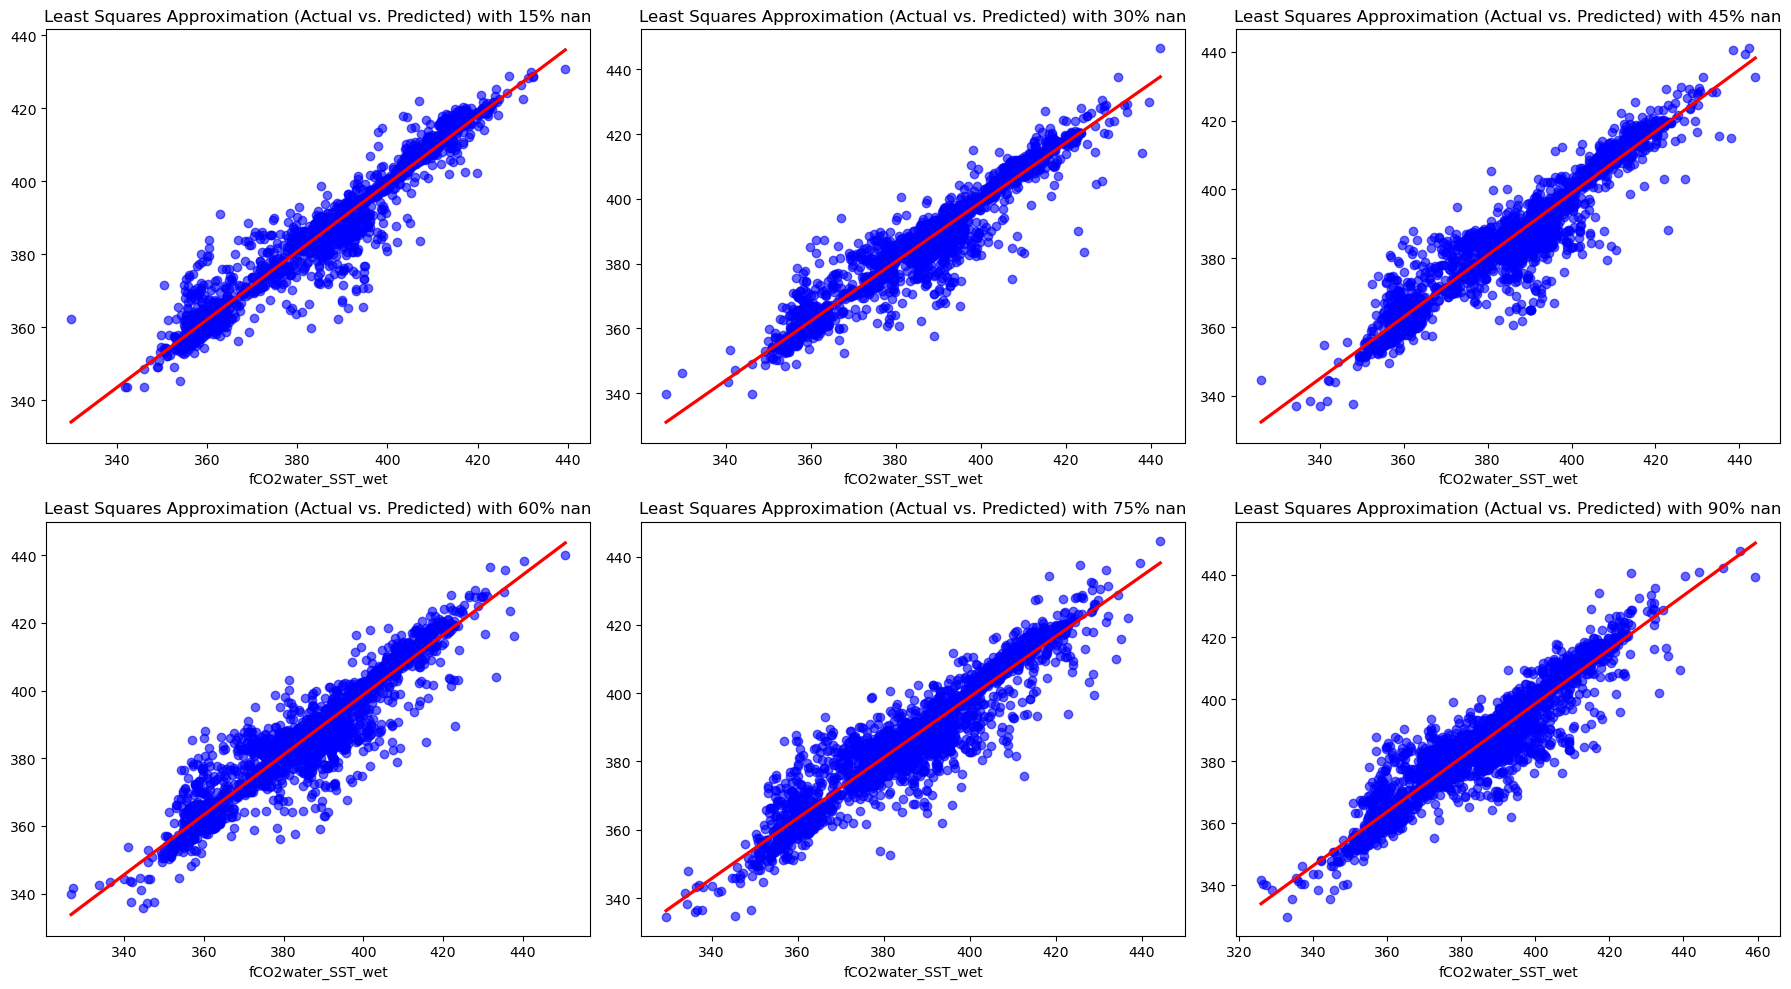

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # to fix the error AttributeError: 'numpy.ndarray' object has no attribute 'plot'

sns.regplot(x=y_test1, y=y_pred1, scatter_kws={"color": "blue", "alpha": 0.6}, line_kws={"color": "red"}, ax=axes[0])
axes[0].set_title("Least Squares Approximation (Actual vs. Predicted) with 15% nan")

sns.regplot(x=y_test2, y=y_pred2, scatter_kws={"color": "blue", "alpha": 0.6}, line_kws={"color": "red"}, ax=axes[1])
axes[1].set_title("Least Squares Approximation (Actual vs. Predicted) with 30% nan")

sns.regplot(x=y_test3, y=y_pred3, scatter_kws={"color": "blue", "alpha": 0.6}, line_kws={"color": "red"}, ax=axes[2])
axes[2].set_title("Least Squares Approximation (Actual vs. Predicted) with 45% nan")

sns.regplot(x=y_test4, y=y_pred4, scatter_kws={"color": "blue", "alpha": 0.6}, line_kws={"color": "red"}, ax=axes[3])
axes[3].set_title("Least Squares Approximation (Actual vs. Predicted) with 60% nan")

sns.regplot(x=y_test5, y=y_pred5, scatter_kws={"color": "blue", "alpha": 0.6}, line_kws={"color": "red"}, ax=axes[4])
axes[4].set_title("Least Squares Approximation (Actual vs. Predicted) with 75% nan")

sns.regplot(x=y_test6, y=y_pred6, scatter_kws={"color": "blue", "alpha": 0.6}, line_kws={"color": "red"}, ax=axes[5])
axes[5].set_title("Least Squares Approximation (Actual vs. Predicted) with 90% nan")

plt.tight_layout()
plt.savefig('Nan_fco2_bob.png', dpi=1000)
plt.show()